In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


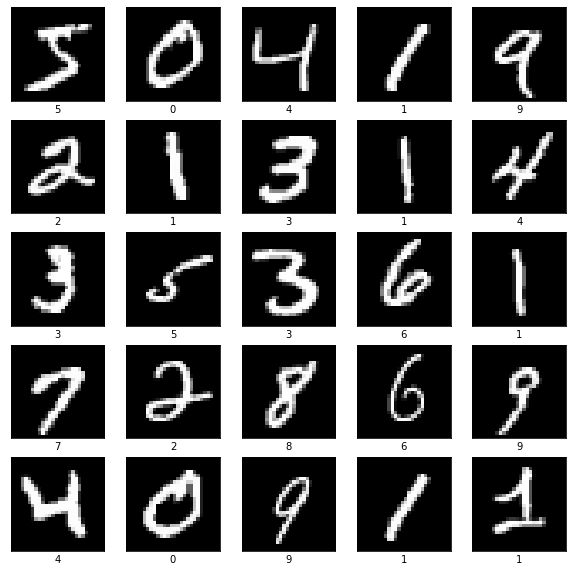

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [4]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), 
                 kernel_size=3, filters=32, 
                 strides=(1,1), activation='relu', padding='SAME'))

model.add(MaxPool2D(pool_size=(2,2), padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [5]:
# model compile
# one hot encoding 방식이 아니기 때문에, loss=sparse_categorical_crossentropy 정의

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
start_time = datetime.now()

hist = model.fit(x_train.reshape(-1,28,28,1), t_train, 
                 batch_size=50, epochs=50, validation_split=0.2)

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
960/960 [==============================] - 11s 11ms/step - loss: 0.2854 - accuracy: 0.9175 - val_loss: 0.1292 - val_accuracy: 0.9651
Epoch 2/50
960/960 [==============================] - 11s 12ms/step - loss: 0.1078 - accuracy: 0.9690 - val_loss: 0.0948 - val_accuracy: 0.9736
Epoch 3/50
960/960 [==============================] - 12s 13ms/step - loss: 0.0774 - accuracy: 0.9777 - val_loss: 0.0821 - val_accuracy: 0.9761
Epoch 4/50
960/960 [==============================] - 13s 14ms/step - loss: 0.0626 - accuracy: 0.9817 - val_loss: 0.0704 - val_accuracy: 0.9803
Epoch 5/50
960/960 [==============================] - 12s 13ms/step - loss: 0.0535 - accuracy: 0.9841 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 6/50
960/960 [==============================] - 13s 13ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0707 - val_accuracy: 0.9787
Epoch 7/50
960/960 [==============================] - 17s 18ms/step - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0700 - val_accuracy:

In [7]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1052 - accuracy: 0.9835


[0.10518891364336014, 0.9835000038146973]

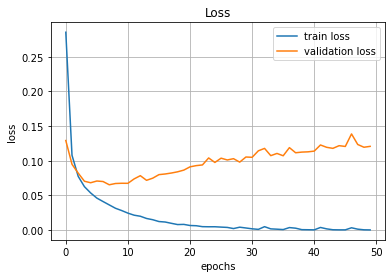

In [8]:
plt.title('Loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

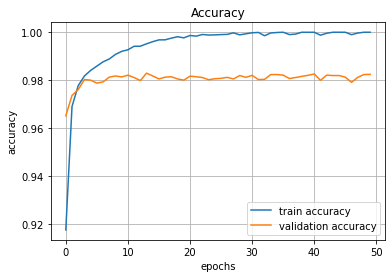

In [9]:
plt.title('Accuracy')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

## 먼저 x_test 를 4차원 tensor 변환

In [16]:
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_test.shape)

(10000, 28, 28, 1)


## 중복하지 않고 random index 추출

In [17]:
rand_idx = np.random.choice(len(x_test), 3, replace=False)

print(rand_idx)

[3086 5660 7566]


## axis=-1 이용하여 행 기준으로 predict 결과 추출

In [18]:
predicted_val = model.predict(x_test[rand_idx])

print(type(predicted_val), predicted_val.shape)

print(np.argmax(predicted_val, axis=-1), t_test[rand_idx])

<class 'numpy.ndarray'> (3, 10)
[4 6 0] [4 6 0]


## np.array() 이용하여 4차원 tensor 변환

In [19]:
test_data_list = [ x_test[idx]  for idx in rand_idx  ]

print(len(test_data_list))

test_data_array = np.array(test_data_list)

print(test_data_array.shape)

3
(3, 28, 28, 1)


In [20]:
predicted_val = model.predict(test_data_array)

print(type(predicted_val), predicted_val.shape)

print(np.argmax(predicted_val, axis=-1), t_test[rand_idx])

<class 'numpy.ndarray'> (3, 10)
[4 6 0] [4 6 0]
